<a href="https://colab.research.google.com/github/eljc1995/PROYECTO-PREDICCION-DE-INFECCION-POR-VIRUS-INFORM-TICO/blob/main/1021_SupML_%7Bjuan_carlos_ospina%7D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROYECTO PREDICCION DE INFECCION POR VIRUS INFORMÁTICO



---

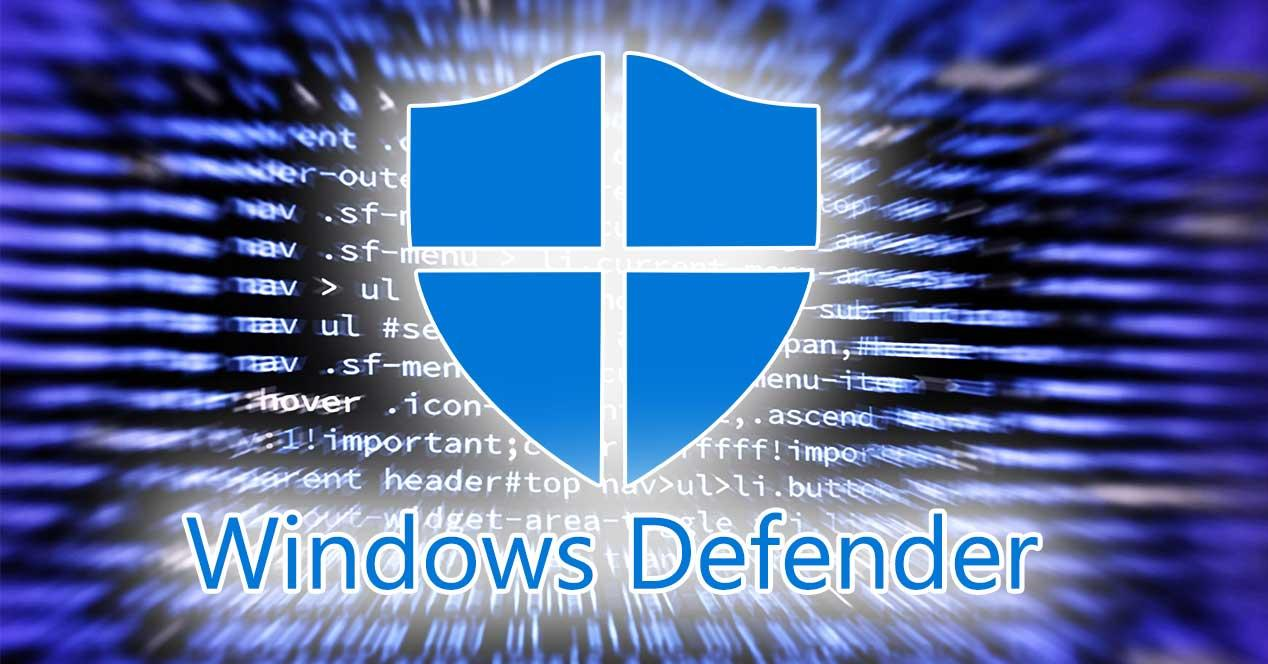






##El objetivo principal consiste en utilizar una serie de campos del csv, para predecir si una máquina está o no infectada por un virus. 





1.   Conectar google drive.
2.   Importar librerias pandas,numpy...
3.   Importar csv.
4.   Análisis de los datos.
5.   Comprobación de nulos.
6.   Separar datos según tipo.
7.   Primer tratamiento de datos.
8.   Lanzar el primer modelo.
9.   Seguir tratando los datos.
10.  Iterar el modelo hasta que haga una predicción aceptable.



In [ ]:
#conectamos con drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importaremos las librerias

#exploración de datos
import pandas as pd
import numpy as np 

#pintar mapas
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px

#otros
import seaborn as sns
from statistics import mean
import math
from google.colab import files

#modelo
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn import  model_selection

from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier

import graphviz


In [ ]:
#importamos csv y lo combertimos en dataframe

df0 = pd.read_csv('/content/drive/MyDrive/00002-Nuclio Digital school/CLASES/5-APRENDIZAJE SUPERVISADO/PROYECTO/sample_mmp.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (29,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#Inspeccionamos el dataframe

---



In [ ]:

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

In [ ]:
df0.head()

Unnamed: 0  ... HasDetections
0     8427007  ...             1
1     8829090  ...             0
2     2731904  ...             0
3     1359513  ...             1
4      236059  ...             1

[5 rows x 84 columns]

In [ ]:
# le cambiamos el index a nuestro df por uno más acorde
df0.set_index('MachineIdentifier', inplace = True)

In [ ]:
df0.tail()

Unnamed: 0  ... HasDetections
MachineIdentifier                             ...              
a739cacc292f3f1e745827c1ca6c6ada     5826339  ...             0
a4c232d528d98343e8f1b73650da7b82     5740034  ...             0
fd16cd542d660848d272e4552bcccb1e     8819786  ...             0
fa0841f8f6147de7c3d287e05270ed42     8713685  ...             0
7b45dc3537e17f16305c5983ca0a1cb9     4295573  ...             1

[5 rows x 83 columns]

In [ ]:
#tenemos una columna sin nombre. la eliminaremos porque no sabemos de que son estos datos
df0.drop(['Unnamed: 0'], axis = 1, inplace = True)


In [ ]:
df0.tail()

ProductName  ... HasDetections
MachineIdentifier                               ...              
a739cacc292f3f1e745827c1ca6c6ada  win8defender  ...             0
a4c232d528d98343e8f1b73650da7b82  win8defender  ...             0
fd16cd542d660848d272e4552bcccb1e  win8defender  ...             0
fa0841f8f6147de7c3d287e05270ed42  win8defender  ...             0
7b45dc3537e17f16305c5983ca0a1cb9  win8defender  ...             1

[5 rows x 82 columns]

In [ ]:
df0.head(10)

ProductName  ... HasDetections
MachineIdentifier                               ...              
f1cd864e97bae82bdf96523e1a539121  win8defender  ...             1
fd5ba6f5b75325ec0423a6c67cc75942  win8defender  ...             0
4e628391e7cc7c482fb3286f486dbd25  win8defender  ...             0
270a2e9d028144a4df12a9e3da79fba5  win8defender  ...             1
06ca8fa8d32c2abdc5b3577d676b3269  win8defender  ...             1
6c3ff3036d3ecc96729a615653742608  win8defender  ...             1
8ab73b7f8dbb0d0d57f54a8b4799e960  win8defender  ...             0
1c4ec21828b563afb6b0aa72ef88926d  win8defender  ...             1
0b247aa88737776d0f88ce4dee447216  win8defender  ...             0
cc9e1141a127a305cddc17baaa36bcb3  win8defender  ...             1

[10 rows x 82 columns]

In [ ]:
df0.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 82 entries, ProductName to HasDetections
dtypes: float64(36), int64(17), object(29)
memory usage: 316.6+ MB


###Analisis del target

In [ ]:
infectado_s_n = df0['HasDetections']

In [ ]:
infectado_s_n.value_counts()

0    250047
1    249953
Name: HasDetections, dtype: int64

Podemos ver que un poco más de la mitad, aprocximadamente el 50,4% no están infectador y un 49,6% de los equipos si lo están 

In [ ]:
#comprobamso que no tenga campos duplicados
df_comprobar = df0[df0.duplicated(keep=False)]
#vemos que nos arroja registros pero el id de las máquinas es diferentes por lo tanto son diferentes equipos.

Antes de eliminar los duplicados aremos copia del dataframe y luego eliminaresmo los duplicados 

In [ ]:
df1 = df0.copy()

In [ ]:
df1.shape

(500000, 82)

In [ ]:
df0.shape

(500000, 82)

In [ ]:
#eliminamos los duplicados
#df1.drop_duplicates(inplace=True)

In [ ]:
#Ahora identificaremos los valores nulos que pueda tener el dataframe vemos que la cantidad de nulos es muy grande
null_data = df1.columns[df1.isnull().any()]
null_data.value_counts

<bound method IndexOpsMixin.value_counts of Index(['RtpStateBitfield', 'DefaultBrowsersIdentifier',
       'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled',
       'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier',
       'OsBuildLab', 'IsProtected', 'PuaMode', 'SMode', 'IeVerIdentifier',
       'SmartScreen', 'Firewall', 'UacLuaenable', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_SystemVolumeTotalCapacity', 'Census_TotalPhysicalRAM',
       'Census_ChassisTypeName',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_PowerPlatformRoleName', 'Census_InternalBatter

In [ ]:
#tenemos un total de 44 variables con nulos de las 84 variables del dataframe
null_data.value_counts().sum()

44

#conclusión primer analisis:

hemos visto que :
 * 1 - tiene un total de 82 columanas y 500.000 filas.
 * 2 - Tiene un total de 44 columnas con nulos.
 * 3 - Vemos que la variable OsBuildLab está compuesta de diferentes variables y que solo tine un nulo.
 * 4 - Podemos ver que un poco más de la mitad, aprocximadamente el 50,4% no están infectados y un 49,6% de los equipos si lo están. 
 * 5 - Los campos identifier deben cambiarse de númericos a categoricos.
 * 6 - El dataFrame que usaremos a partir de ahora será df1

In [ ]:
df1.head(3)

ProductName  ... HasDetections
MachineIdentifier                               ...              
f1cd864e97bae82bdf96523e1a539121  win8defender  ...             1
fd5ba6f5b75325ec0423a6c67cc75942  win8defender  ...             0
4e628391e7cc7c482fb3286f486dbd25  win8defender  ...             0

[3 rows x 82 columns]

In [ ]:
# vemos que la variable OsBuildLab es una combinacin de 'OsBuild','Census_OSArchitecture','Census_OSBranch'
# y por lo tanto la eliminaremos 
df1[['OsBuildLab','Census_OSArchitecture','Census_OSBranch','OsBuild']].isnull().sum()

OsBuildLab               1
Census_OSArchitecture    0
Census_OSBranch          0
OsBuild                  0
dtype: int64

In [ ]:
#Pendiente comprobar ultima parte de la variable '180410-1804', de que variable deriba.


#A continuación  vamos a tratar los campos 'identifier' puesto que la mayoria son de tipo numérico y deberia de ser de tipo object 

In [ ]:
# obtenemos los nombres de todas las columnas
nombres = df1.columns.values

In [ ]:
nombres

array(['ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion',
       'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn',
       'PuaMode', 'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall',
       'UacLuaenable', 'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_SystemVolumeTo

In [ ]:
#filtramos los nombres que tengan la palabra Identifier en su interior y hacemos una lista con esos nombres.
str_match_identifier = [s for s in nombres if "Identifier" in s]
print(str_match_identifier)

['DefaultBrowsersIdentifier', 'AVProductStatesIdentifier', 'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'IeVerIdentifier', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier', 'Census_FirmwareManufacturerIdentifier', 'Census_FirmwareVersionIdentifier', 'Wdft_RegionIdentifier']


In [ ]:
len(str_match_identifier)

17

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 82 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ProductName                                        500000 non-null  object 
 1   EngineVersion                                      500000 non-null  object 
 2   AppVersion                                         500000 non-null  object 
 3   AvSigVersion                                       500000 non-null  object 
 4   IsBeta                                             500000 non-null  int64  
 5   RtpStateBitfield                                   498168 non-null  float64
 6   IsSxsPassiveMode                                   500000 non-null  int64  
 7   DefaultBrowsersIdentifier                          24061 non-null   float64
 8   AVProductStatesIdentif

In [ ]:
#aquí vemos que este es de tipo float
df1['DefaultBrowsersIdentifier']

MachineIdentifier
f1cd864e97bae82bdf96523e1a539121   NaN
fd5ba6f5b75325ec0423a6c67cc75942   NaN
4e628391e7cc7c482fb3286f486dbd25   NaN
270a2e9d028144a4df12a9e3da79fba5   NaN
06ca8fa8d32c2abdc5b3577d676b3269   NaN
                                    ..
a739cacc292f3f1e745827c1ca6c6ada   NaN
a4c232d528d98343e8f1b73650da7b82   NaN
fd16cd542d660848d272e4552bcccb1e   NaN
fa0841f8f6147de7c3d287e05270ed42   NaN
7b45dc3537e17f16305c5983ca0a1cb9   NaN
Name: DefaultBrowsersIdentifier, Length: 500000, dtype: float64

In [ ]:
#aqui le pasamos nuestra lista al df para ver que nos saca todos los campos con identifier 
df1[str_match_identifier]

DefaultBrowsersIdentifier  ...  Wdft_RegionIdentifier
MachineIdentifier                                            ...                       
f1cd864e97bae82bdf96523e1a539121                        NaN  ...                   11.0
fd5ba6f5b75325ec0423a6c67cc75942                        NaN  ...                    3.0
4e628391e7cc7c482fb3286f486dbd25                        NaN  ...                   15.0
270a2e9d028144a4df12a9e3da79fba5                        NaN  ...                   15.0
06ca8fa8d32c2abdc5b3577d676b3269                        NaN  ...                   13.0
...                                                     ...  ...                    ...
a739cacc292f3f1e745827c1ca6c6ada                        NaN  ...                   10.0
a4c232d528d98343e8f1b73650da7b82                        NaN  ...                   15.0
fd16cd542d660848d272e4552bcccb1e                        NaN  ...                    8.0
fa0841f8f6147de7c3d287e05270ed42                        NaN  ...                    1.0
7b45dc3537e17f16305c5983ca0a1cb9                        NaN  ...                    4.0

[500000 rows x 17 columns]

In [ ]:
#ahora con esta lista combertiremos todos los identifier en tipo object


for str_match_identifier in df1[str_match_identifier]:
  df1[str_match_identifier] = df1[str_match_identifier].astype(object)





In [ ]:
# aquí podemos comprobar que se ha realizado el cambio de tipo
df1['DefaultBrowsersIdentifier']

MachineIdentifier
f1cd864e97bae82bdf96523e1a539121    NaN
fd5ba6f5b75325ec0423a6c67cc75942    NaN
4e628391e7cc7c482fb3286f486dbd25    NaN
270a2e9d028144a4df12a9e3da79fba5    NaN
06ca8fa8d32c2abdc5b3577d676b3269    NaN
                                   ... 
a739cacc292f3f1e745827c1ca6c6ada    NaN
a4c232d528d98343e8f1b73650da7b82    NaN
fd16cd542d660848d272e4552bcccb1e    NaN
fa0841f8f6147de7c3d287e05270ed42    NaN
7b45dc3537e17f16305c5983ca0a1cb9    NaN
Name: DefaultBrowsersIdentifier, Length: 500000, dtype: object

In [ ]:
# y que todos los otros campos siguen conservando su tipo
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 82 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ProductName                                        500000 non-null  object 
 1   EngineVersion                                      500000 non-null  object 
 2   AppVersion                                         500000 non-null  object 
 3   AvSigVersion                                       500000 non-null  object 
 4   IsBeta                                             500000 non-null  int64  
 5   RtpStateBitfield                                   498168 non-null  float64
 6   IsSxsPassiveMode                                   500000 non-null  int64  
 7   DefaultBrowsersIdentifier                          24061 non-null   object 
 8   AVProductStatesIdentif

# Antes de empezar con el tratamiento de las diferentes variables, vamos a hacer unas listas con las cuales poder dividir el tipo de variable según tipo y si es o no el target 

In [ ]:
#para dividir por tipo de variables, usaremos una funcón.

In [ ]:
#funcion que nos divide las variables según tipo

target= ["HasDetections"]
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype=="float64" or dataset[i].dtype=="int64") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype=="float64" or dataset[i].dtype=="int64") and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype=="object")  and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas



In [ ]:
#llamamos la función y generamos 3 listas con los diferentes tipos de variables.
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df1)

In [ ]:
# a continuación imprimiremos la lista de las variables por tipo.
print(len(df0.columns), "total de variables")
print(len(target), "variable a predecir")
print(len(lista_categoricas), "variables categóricas")
print(len(lista_boolean), "variables boolean")
print(len(lista_numericas), "variables numéricas")

82 total de variables
1 variable a predecir
46 variables categóricas
10 variables boolean
25 variables numéricas


#### Ahora tenemos 3 listas que nos ayudan a filtrar el dataframe según tipo de variable. Esto nos ayudara a su limpieza más adelante.

#Tratamiento de las boleanas

A continuación vamos a empezar con las variables boleanas ya que son las que menos nulos tienen.

In [ ]:
df1[lista_boolean].isnull().sum() # lista de variables boleanas con y sin nulos

IsBeta                                   0
IsSxsPassiveMode                         0
HasTpm                                   0
AutoSampleOptIn                          0
Census_HasOpticalDiskDrive               0
Census_IsPortableOperatingSystem         0
Census_IsSecureBootEnabled               0
Census_IsWIMBootEnabled             317666
Census_IsTouchEnabled                    0
Census_IsPenCapable                      0
dtype: int64

In [ ]:
#creamos dataframe con solo las variables boleanas con esto podremos probar sin comprometer los datos originales.
df_solo_boleanas = pd.DataFrame()
df_solo_boleanas = df0[lista_boolean].copy()
df_solo_boleanas.head()

IsBeta  ...  Census_IsPenCapable
MachineIdentifier                         ...                     
f1cd864e97bae82bdf96523e1a539121       0  ...                    0
fd5ba6f5b75325ec0423a6c67cc75942       0  ...                    0
4e628391e7cc7c482fb3286f486dbd25       0  ...                    1
270a2e9d028144a4df12a9e3da79fba5       0  ...                    0
06ca8fa8d32c2abdc5b3577d676b3269       0  ...                    0

[5 rows x 10 columns]

In [ ]:
#Aqui podemos observar que la variable con nulos solamente tiene el valor 0, asi 
#que imputaremos 1 a todos los valores que tenga nulos
df_solo_boleanas['Census_IsWIMBootEnabled'].value_counts()

0.0    182334
Name: Census_IsWIMBootEnabled, dtype: int64

In [ ]:
df_solo_boleanas['Census_IsWIMBootEnabled'].fillna(1,inplace = True)

In [ ]:
df_solo_boleanas.isnull().sum()

IsBeta                              0
IsSxsPassiveMode                    0
HasTpm                              0
AutoSampleOptIn                     0
Census_HasOpticalDiskDrive          0
Census_IsPortableOperatingSystem    0
Census_IsSecureBootEnabled          0
Census_IsWIMBootEnabled             0
Census_IsTouchEnabled               0
Census_IsPenCapable                 0
dtype: int64

**Ahora aplicaremos nuestro resultado al df de trabajo que en este caso es df1**

In [ ]:
df1['Census_IsWIMBootEnabled'].fillna(1,inplace = True)

In [ ]:
df1[lista_boolean].isnull().sum()

IsBeta                              0
IsSxsPassiveMode                    0
HasTpm                              0
AutoSampleOptIn                     0
Census_HasOpticalDiskDrive          0
Census_IsPortableOperatingSystem    0
Census_IsSecureBootEnabled          0
Census_IsWIMBootEnabled             0
Census_IsTouchEnabled               0
Census_IsPenCapable                 0
dtype: int64

**De esta manera tenemos todas la bariables boleanas listas para pasar a nuestro primer modelo.**

Ahora vamos a crear un primer modelo 'tonto', al cual le pasaremos un df que contenga todas las variables sin nulos. este, será nuestro punto de partida.

In [ ]:
df1.isnull().sum()


ProductName                                    0
EngineVersion                                  0
AppVersion                                     0
AvSigVersion                                   0
IsBeta                                         0
                                           ...  
Census_IsPenCapable                            0
Census_IsAlwaysOnAlwaysConnectedCapable     4040
Wdft_IsGamer                               16950
Wdft_RegionIdentifier                      16950
HasDetections                                  0
Length: 82, dtype: int64

In [ ]:
 #Ahora identificaremos los valores nulos que pueda tener el dataframe vemos que la cantidad de nulos es de 43
 #variables así que crearemos otro dataframe y eliminaremos los nulos sobre el nuevo, de esta manera  tendremos nuestro primer 
 # modelo sobre el cual iterar.
null_data = df1.columns[df1.isnull().any()]
null_data.value_counts().sum()


43

#Creamos el primer modelo

In [ ]:
# hacemos una copia del df de trabajo
df_sin_nulos1 = df1.copy()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 82 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ProductName                                        500000 non-null  object 
 1   EngineVersion                                      500000 non-null  object 
 2   AppVersion                                         500000 non-null  object 
 3   AvSigVersion                                       500000 non-null  object 
 4   IsBeta                                             500000 non-null  int64  
 5   RtpStateBitfield                                   498168 non-null  float64
 6   IsSxsPassiveMode                                   500000 non-null  int64  
 7   DefaultBrowsersIdentifier                          24061 non-null   object 
 8   AVProductStatesIdentif

In [ ]:
df_sin_nulos1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 82 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ProductName                                        500000 non-null  object 
 1   EngineVersion                                      500000 non-null  object 
 2   AppVersion                                         500000 non-null  object 
 3   AvSigVersion                                       500000 non-null  object 
 4   IsBeta                                             500000 non-null  int64  
 5   RtpStateBitfield                                   498168 non-null  float64
 6   IsSxsPassiveMode                                   500000 non-null  int64  
 7   DefaultBrowsersIdentifier                          24061 non-null   object 
 8   AVProductStatesIdentif

In [ ]:
#comprobamos 
df1.shape

(500000, 82)

In [ ]:
#comprobamos 
df_sin_nulos1.shape

(500000, 82)

In [ ]:
#eliminamos las columnas nulas del nuevo df
df_sin_nulos1.drop(columns=null_data, axis=1, inplace = True)

In [ ]:
#comprobamos que el nuevo dataframe no tiene nulos 
null_data = df_sin_nulos1.columns[df_sin_nulos1.isnull().any()]
null_data.value_counts().sum()

0

In [ ]:
#podemos comprobar que el dataframe se ha redusido considerablemente 
df_sin_nulos1.shape

(500000, 39)

In [ ]:
# aquí comprobamos que el df de trabajo sigue como antes.
df1.shape

(500000, 82)

**Ya que el algoritmo que vamos a utilizar funciona solo con variables del tipo integer, vamos a eliminar todas las variables de tipo categoricas.**

In [ ]:
df_sin_nulos1.drop(columns=lista_categoricas,axis=1,errors = "ignore",inplace = True )

In [ ]:
df_sin_nulos1.shape


(500000, 15)

In [ ]:
df_sin_nulos1.shape

(500000, 15)

In [ ]:
df_sin_nulos1.head()

IsBeta  ...  HasDetections
MachineIdentifier                         ...               
f1cd864e97bae82bdf96523e1a539121       0  ...              1
fd5ba6f5b75325ec0423a6c67cc75942       0  ...              0
4e628391e7cc7c482fb3286f486dbd25       0  ...              0
270a2e9d028144a4df12a9e3da79fba5       0  ...              1
06ca8fa8d32c2abdc5b3577d676b3269       0  ...              1

[5 rows x 15 columns]

dividir dataFrame en train,test y valid


###Para divivir el dataframe usaremos las siguientes proporciones

```
train 60% ------> 299.978
test 20% ------> 99.992
validation 20% ------> 99.992
dev train + test ------> 399.970

```



In [ ]:
dev_df = df_sin_nulos1[0:399970] #development = train + test
dev_df.shape

(399970, 15)

In [ ]:
val_df = df_sin_nulos1[399970:] # validation
val_df.shape

(100030, 15)

In [ ]:
dev_df_X = dev_df.drop("HasDetections", axis= 1)
dev_df_y = dev_df[['HasDetections']]

In [ ]:
print(dev_df_X.shape)
print(dev_df_y.shape)

(399970, 14)
(399970, 1)


In [ ]:
val_df_X = val_df.drop("HasDetections", axis= 1)
val_df_y = val_df[['HasDetections']]

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        dev_df_X, # X 
                                        dev_df_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [ ]:
X_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 279979 entries, af850a235beca1e91378be6955484c64 to 88cd798b2363fe2707aa04b6232692ad
Columns: 14 entries, IsBeta to Census_IsPenCapable
dtypes: float64(1), int64(13)
memory usage: 32.0+ MB


In [ ]:
X_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Index: 119991 entries, 5465eff30d7f9dbdf267e21738163d55 to e2338d2d512bf8a2712cab9bf7706d1a
Columns: 14 entries, IsBeta to Census_IsPenCapable
dtypes: float64(1), int64(13)
memory usage: 13.7+ MB


In [ ]:
X_train.describe().T.head()

count          mean  ...      75%      max
IsBeta            279979.0      0.000000  ...      0.0      0.0
IsSxsPassiveMode  279979.0      0.017073  ...      0.0      1.0
HasTpm            279979.0      0.987835  ...      1.0      1.0
OsBuild           279979.0  15728.315031  ...  17134.0  18242.0
OsSuite           279979.0    574.991210  ...    768.0    784.0

[5 rows x 8 columns]

In [ ]:
X_test.describe().T.head()

count          mean  ...      75%      max
IsBeta            119991.0      0.000000  ...      0.0      0.0
IsSxsPassiveMode  119991.0      0.018110  ...      0.0      1.0
HasTpm            119991.0      0.987607  ...      1.0      1.0
OsBuild           119991.0  15723.795510  ...  17134.0  18242.0
OsSuite           119991.0    574.564617  ...    768.0    784.0

[5 rows x 8 columns]

In [ ]:
dt = DecisionTreeClassifier(
                        # criterion='gini',
                        # splitter='best',
                        max_depth=10, # Importante, regulará el sobreajuste
                        # min_samples_split=2,
                        # min_samples_leaf=1,
                        # min_weight_fraction_leaf=0.0,
                        # max_features=None,
                        random_state=42,
                        # max_leaf_nodes=None,
                        # min_impurity_decrease=0.0,
                        # min_impurity_split=None,
                        # class_weight=None,
                        # presort=False,  
                )

In [ ]:
dt.fit(
    X=X_train, 
    y=y_train, 
    # sample_weight=None, 
    # check_input=True, 
    # X_idx_sorted=None
)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
dot_data = export_graphviz(
                        decision_tree = dt,
                        out_file=None,
                        # max_depth=None,
                        feature_names=X_test.columns,
                        class_names=['No delay', 'Delay'],
                        # label='all',
                        filled=True,
                        # leaves_parallel=False,
                        impurity=True,
                        # node_ids=False,
                        proportion=True,
                        rotate=True,
                        rounded=True,
                        # special_characters=False,
                        precision=4,
                        )

con la siguuiente linea pintamos el arbol pero no es ecesario y podemos ahorrar algo de ram 

In [ ]:
graph = graphviz.Source(dot_data)
graph

In [ ]:
y_test_pred = pd.DataFrame(dt.predict(X_test), index=y_test.index, columns=['HasDetectionsPrediction'])

In [ ]:
y_test_pred.head()

HasDetectionsPrediction
MachineIdentifier                                        
5465eff30d7f9dbdf267e21738163d55                        1
b55559d453717251797e4cc2e7b57f9f                        1
a3b055f6940ec1d7eb5499d6ee018500                        1
8d4cb0cd43653125be968b49dc715c6c                        1
b42d573280117f562dd20f0f13fabba0                        1

In [ ]:
y_test.head()

HasDetections
MachineIdentifier                              
5465eff30d7f9dbdf267e21738163d55              1
b55559d453717251797e4cc2e7b57f9f              1
a3b055f6940ec1d7eb5499d6ee018500              0
8d4cb0cd43653125be968b49dc715c6c              1
b42d573280117f562dd20f0f13fabba0              1

In [ ]:
y_test.shape

(119991, 1)

In [ ]:
y_test_pred.shape

(119991, 1)

In [ ]:
results_df = y_test.join(y_test_pred, how= 'inner')

In [ ]:
results_df.head(10)

HasDetections  HasDetectionsPrediction
MachineIdentifier                                                       
5465eff30d7f9dbdf267e21738163d55              1                        1
b55559d453717251797e4cc2e7b57f9f              1                        1
a3b055f6940ec1d7eb5499d6ee018500              0                        1
8d4cb0cd43653125be968b49dc715c6c              1                        1
b42d573280117f562dd20f0f13fabba0              1                        1
5362ab410d918e0fee2af923c2051ee8              0                        0
1f9d19d9c683f469d4199d280004f54e              1                        0
1497843939847c6c857b70ea548417df              0                        1
bc894ab75ff7308b926dcad7cbfda4bc              1                        0
3896274f10713e9b56ec736e20d76167              0                        1

In [ ]:
results_df['Success'] = (results_df['HasDetections'] == results_df['HasDetectionsPrediction']).astype(int)

In [ ]:
results_df.head(12)

HasDetections  ...  Success
MachineIdentifier                                ...         
5465eff30d7f9dbdf267e21738163d55              1  ...        1
b55559d453717251797e4cc2e7b57f9f              1  ...        1
a3b055f6940ec1d7eb5499d6ee018500              0  ...        0
8d4cb0cd43653125be968b49dc715c6c              1  ...        1
b42d573280117f562dd20f0f13fabba0              1  ...        1
5362ab410d918e0fee2af923c2051ee8              0  ...        1
1f9d19d9c683f469d4199d280004f54e              1  ...        0
1497843939847c6c857b70ea548417df              0  ...        0
bc894ab75ff7308b926dcad7cbfda4bc              1  ...        0
3896274f10713e9b56ec736e20d76167              0  ...        0
12cb47478424275236cda2907ba5faab              1  ...        0
56dcd61a25180b025ea318d14d1c0723              1  ...        1

[12 rows x 3 columns]

In [ ]:
results_df.shape

(119991, 3)

In [ ]:
results_df['Success'].count()

119991

In [ ]:
#la primera vuelta fue con 4 preguntas y tenia un 60% de acierto, ahora eh subido a 10 y el ratio de acierto a subido a 64,10
results_df['Success'].sum()

64388

###conclusión nuestro modelo 'tonto' es capas de predecir con una tasa de éxito superior al 60%. Ahora trataremos más variables con nulos y aremos que mejore.

#Tratamiento de nulos en las numéricas 

In [ ]:
#vamos a nalizar la lista de numéricas 
lista_numericas

['RtpStateBitfield',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'OsBuild',
 'OsSuite',
 'IsProtected',
 'SMode',
 'Firewall',
 'UacLuaenable',
 'Census_ProcessorCoreCount',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_IsFlightingInternal',
 'Census_IsFlightsDisabled',
 'Census_ThresholdOptIn',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer']

In [ ]:
#antes de ponernos a trabajar crearemos un df aparte, para hacer nuestras pruebas
df_solo_numericas = pd.DataFrame()
df_solo_numericas = df1.copy()
df_solo_numericas.head()

ProductName  ... HasDetections
MachineIdentifier                               ...              
f1cd864e97bae82bdf96523e1a539121  win8defender  ...             1
fd5ba6f5b75325ec0423a6c67cc75942  win8defender  ...             0
4e628391e7cc7c482fb3286f486dbd25  win8defender  ...             0
270a2e9d028144a4df12a9e3da79fba5  win8defender  ...             1
06ca8fa8d32c2abdc5b3577d676b3269  win8defender  ...             1

[5 rows x 82 columns]

In [ ]:
df_solo_numericas.isnull().sum()

ProductName                                    0
EngineVersion                                  0
AppVersion                                     0
AvSigVersion                                   0
IsBeta                                         0
                                           ...  
Census_IsPenCapable                            0
Census_IsAlwaysOnAlwaysConnectedCapable     4040
Wdft_IsGamer                               16950
Wdft_RegionIdentifier                      16950
HasDetections                                  0
Length: 82, dtype: int64

In [ ]:
df_solo_numericas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 82 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   ProductName                                        500000 non-null  object 
 1   EngineVersion                                      500000 non-null  object 
 2   AppVersion                                         500000 non-null  object 
 3   AvSigVersion                                       500000 non-null  object 
 4   IsBeta                                             500000 non-null  int64  
 5   RtpStateBitfield                                   498168 non-null  float64
 6   IsSxsPassiveMode                                   500000 non-null  int64  
 7   DefaultBrowsersIdentifier                          24061 non-null   object 
 8   AVProductStatesIdentif

In [ ]:
len(lista_numericas)

25

In [ ]:
df_solo_numericas[lista_numericas].isnull().sum()

RtpStateBitfield                                       1832
AVProductsInstalled                                    1938
AVProductsEnabled                                      1938
OsBuild                                                   0
OsSuite                                                   0
IsProtected                                            1926
SMode                                                 29848
Firewall                                               5162
UacLuaenable                                            623
Census_ProcessorCoreCount                              2347
Census_PrimaryDiskTotalCapacity                        2976
Census_SystemVolumeTotalCapacity                       2976
Census_TotalPhysicalRAM                                4556
Census_InternalPrimaryDiagonalDisplaySizeInInches      2654
Census_InternalPrimaryDisplayResolutionHorizontal      2650
Census_InternalPrimaryDisplayResolutionVertical        2650
Census_InternalBatteryNumberOfCharges   

**podemos ver que 21 de las 25 variables numéricas contienen nulos**

usaremos esto para sacar una lista de las variables numericas en un excel, así podemos tener un control de las variables que vayamos tratando.

In [ ]:
df_numericas_excel = df_solo_numericas[lista_numericas].describe(include = 'all').T
df_numericas_excel.to_excel('df_numericas_excel.xlsx')

In [ ]:

df_numericas_excel.to_excel('df_numericas_excel.xlsx')
files.download('df_numericas_excel.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

empezamos a tratar 'RtpStateBitfield'

In [ ]:
# vemos cuantos nulos tiene 
df_solo_numericas['RtpStateBitfield'].isnull().sum()

1832

In [ ]:
#vemos la proporción de sus datos 
df_solo_numericas['RtpStateBitfield'].value_counts()

7.0     484841
0.0      10610
8.0       1277
5.0       1158
3.0        176
1.0        105
35.0         1
Name: RtpStateBitfield, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


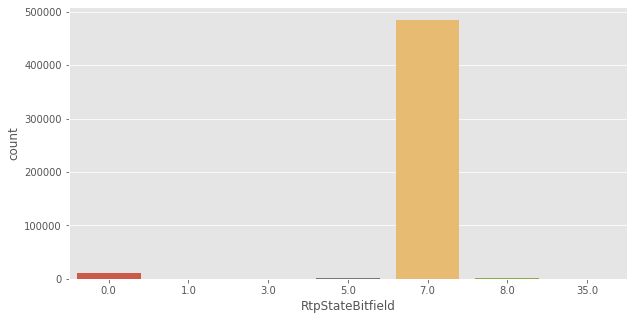

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(
    
    df_solo_numericas['RtpStateBitfield']
    )

podemos ver que la gran mayoria de losregistros son 7.0 y que tenemos escasos registros diferente asi que vamos a quedarnas con :
 * 7.0 ------------>484841
 * 0.0 ------------>10610
 * 8.0 ------------>1277
 * 5.0 ------------>1158

---


Para poder hacer esto vamos a implementar una función al a que llamaremos setOthers 

In [ ]:
def setOthers(dataframe, column, num_values):
  top_categories = dataframe[column].value_counts().head(num_values)
  top_categories_list = top_categories.index.to_list() 
  top_categories_list.append(404)
  dataframe[column] = pd.Categorical(dataframe[column], categories = top_categories_list )
  return dataframe[column].fillna(404)

In [ ]:
df_solo_numericas['RtpStateBitfield'].value_counts()

7.0     484841
0.0      10610
8.0       1277
5.0       1158
3.0        176
1.0        105
35.0         1
Name: RtpStateBitfield, dtype: int64

In [ ]:
df_solo_numericas['RtpStateBitfield'] = setOthers(df_solo_numericas,'RtpStateBitfield',4)

In [ ]:
df_solo_numericas['RtpStateBitfield'].value_counts()

7.0      484841
0.0       10610
404.0      2114
8.0        1277
5.0        1158
Name: RtpStateBitfield, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


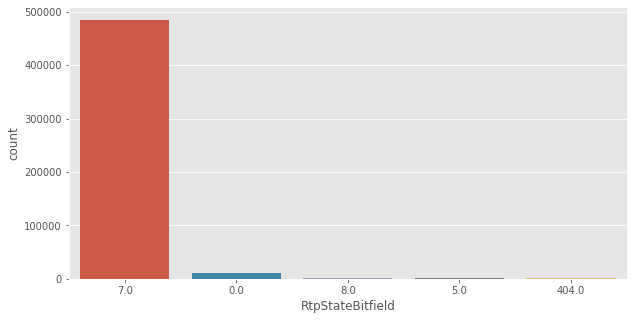

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(
    
    df_solo_numericas['RtpStateBitfield']
    )

In [ ]:
########################################################################################################################################

In [ ]:
df_solo_numericas['AVProductsInstalled'].isnull().sum()

1938

In [ ]:
df_solo_numericas['AVProductsInstalled'].value_counts()

1.0    348046
2.0    137856
3.0     11617
4.0       514
5.0        29
Name: AVProductsInstalled, dtype: int64

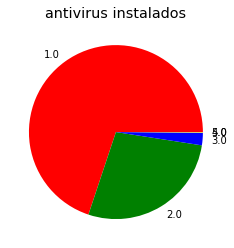

In [ ]:
etiquetas = ['1.0','2.0','3.0','4.0','5.0']
valores = [348046,137856,11617,514,29]
colores = ['red','green','blue','yellow','pink']

plt.pie(x=valores, labels=etiquetas, colors = colores)
plt.title('antivirus instalados')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


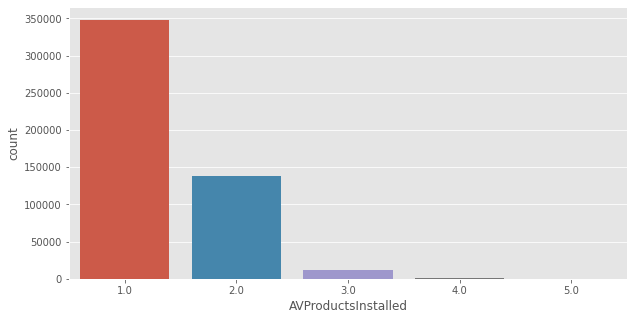

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(
    
    df_solo_numericas['AVProductsInstalled']
    )

podemos ver que la mayoria de máquinas tienen  un solo antivirus pero, hay algunas que tiene más de uno. nos vamos a quedar solo con los 3 primeros registros

In [ ]:
df_solo_numericas['AVProductsInstalled'] = setOthers(df_solo_numericas,'AVProductsInstalled',3)

In [ ]:
df_solo_numericas['AVProductsInstalled'].value_counts().count()

4

In [ ]:
########################################################################################################################################

para ahorrarnos tiempo vamos a hacer un bucle que nos imprima una lista de las variables que tengan más valores diferentes, a estás les aplicaremos nuestra funcón y a las demas que tengan nulos les imputaremos otro valor. 

In [ ]:
#lista con todas las columnas del dataframe

#nombres_columnas = lista_numericas

In [ ]:
#len(nombres_columnas)

In [ ]:
#len(nombres_columnas)

In [ ]:
#aquí imprimimos la lista anterior y recorremos el dataframe sacando la cantidad de valores diferentes por columna
#for nombres_columnas in df_solo_numericas:
 #    print(nombres_columnas,df_solo_numericas[nombres_columnas].value_counts().count()) 

In [ ]:
########################################################################################################################################

In [ ]:
df_solo_numericas['OsBuild'].isnull().sum()

0

**Algo importante es ver que no tiene nulos, asi que simplemente nos quedaremos con los valores más relevantes, aplicando la función**

In [ ]:
# nos quedaremos con los 8 primeros valores 
df_solo_numericas['OsBuild'].value_counts()

17134    220779
16299    139901
15063     43352
14393     40717
10586     22955
10240     15014
9600      10825
7601       5281
17692       155
17738       134
17744       129
17758        86
17746        62
17713        60
17754        56
17751        53
17741        51
17755        45
17735        37
17686        36
17733        34
17763        33
7600         33
17760        31
17682        20
17677        17
18234        16
17672        15
18242        12
18237        12
17661         9
17666         8
17723         4
17634         4
17730         3
17639         3
17747         3
17618         3
17655         2
17650         2
18219         1
17704         1
18214         1
17623         1
17604         1
17749         1
17753         1
17711         1
Name: OsBuild, dtype: int64

In [ ]:
df_solo_numericas['OsBuild'] = setOthers(df_solo_numericas,'OsBuild',8)

In [ ]:
df_solo_numericas['OsBuild'].value_counts()

17134    220779
16299    139901
15063     43352
14393     40717
10586     22955
10240     15014
9600      10825
7601       5281
404        1176
Name: OsBuild, dtype: int64

In [ ]:
########################################################################################################################################

In [ ]:
df_solo_numericas['OsSuite'].value_counts()

768    311226
256    187951
272       677
16         53
400        47
305        33
784        10
274         2
18          1
Name: OsSuite, dtype: int64

In [ ]:
#sin nulos 
df_solo_numericas['OsSuite'].isnull().sum()

0

In [ ]:
df_solo_numericas['OsSuite'] = setOthers(df_solo_numericas,'OsSuite',2)

In [ ]:
########################################################################################################################################

In [ ]:
df_solo_numericas['UacLuaenable'].isnull().sum()

623

In [ ]:
df_solo_numericas['UacLuaenable'].value_counts()

1.0          496276
0.0            3086
48.0             13
6357062.0         1
2.0               1
Name: UacLuaenable, dtype: int64

In [ ]:
df_solo_numericas['UacLuaenable'] = setOthers(df_solo_numericas,'UacLuaenable',2)

In [ ]:
df_solo_numericas['UacLuaenable'].isnull().sum()

0

In [ ]:
########################################################################################################################################

In [ ]:
df_solo_numericas['Census_ProcessorCoreCount'].isnull().sum()

2347

In [ ]:
df_solo_numericas['Census_ProcessorCoreCount'].value_counts()

4.0     304102
2.0     129178
8.0      48995
12.0      5184
6.0       4023
1.0       3980
16.0      1006
3.0        752
32.0       113
20.0        97
24.0        95
40.0        39
28.0        17
36.0        16
48.0        15
5.0         10
10.0        10
56.0         8
7.0          3
11.0         2
64.0         2
80.0         1
52.0         1
14.0         1
46.0         1
88.0         1
44.0         1
Name: Census_ProcessorCoreCount, dtype: int64

In [ ]:
df_solo_numericas['Census_ProcessorCoreCount'] = setOthers(df_solo_numericas,'Census_ProcessorCoreCount',7)

In [ ]:
df_solo_numericas['Census_ProcessorCoreCount'].value_counts()

4.0      304102
2.0      129178
8.0       48995
12.0       5184
6.0        4023
1.0        3980
404.0      3532
16.0       1006
Name: Census_ProcessorCoreCount, dtype: int64

In [ ]:
########################################################################################################################################

In [ ]:
df_solo_numericas['Census_PrimaryDiskTotalCapacity'].isnull().sum()

2976

In [ ]:
df_solo_numericas['Census_PrimaryDiskTotalCapacity'].value_counts()

476940.0     158683
953869.0     122183
305245.0      26687
122104.0      26444
244198.0      25159
              ...  
428672.0          1
1714166.0         1
1713750.0         1
213952.0          1
1048575.0         1
Name: Census_PrimaryDiskTotalCapacity, Length: 1103, dtype: int64

In [ ]:
df_solo_numericas['Census_PrimaryDiskTotalCapacity'].value_counts().count()

1103

In [ ]:
df_solo_numericas['Census_PrimaryDiskTotalCapacity'].count()

497024

por lo general los discos duros ssd van de 240GB, 480, o 960 GB y los mecanicos de 500 GB 1TB, 2TB, 4TB hasta  8TB esto nos da un abanico de 8 valores incluyendo los ssd y los discos mecanicos. asi que aplicaremos el algoritmo y nos quedaremos con esos 8 valores 

In [ ]:
df_solo_numericas['Census_PrimaryDiskTotalCapacity'] = setOthers(df_solo_numericas,'Census_PrimaryDiskTotalCapacity',8)

In [ ]:
df_solo_numericas['Census_PrimaryDiskTotalCapacity'].value_counts()

476940.0    158683
953869.0    122183
404.0        91566
305245.0     26687
122104.0     26444
244198.0     25159
238475.0     17622
29820.0      17073
114473.0     14583
Name: Census_PrimaryDiskTotalCapacity, dtype: int64

In [ ]:
########################################################################################################################################

 **esta variable es una deribada de la anterior tratada asi que le realizaremos el mismo proceso**

In [ ]:
df_solo_numericas['Census_SystemVolumeTotalCapacity'].isnull().sum()

2976

In [ ]:
df_solo_numericas['Census_SystemVolumeTotalCapacity'] = setOthers(df_solo_numericas,'Census_SystemVolumeTotalCapacity',8)

In [ ]:
df_solo_numericas['Census_SystemVolumeTotalCapacity'].isnull().sum()

0

In [ ]:
########################################################################################################################################

In [ ]:
df_solo_numericas['Census_TotalPhysicalRAM'].isnull().sum()

4556

In [ ]:
df_solo_numericas['Census_TotalPhysicalRAM'].value_counts()

4096.0     228678
8192.0     123174
2048.0      61694
16384.0     30179
6144.0      22349
            ...  
6291.0          1
8064.0          1
1791.0          1
6323.0          1
32767.0         1
Name: Census_TotalPhysicalRAM, Length: 552, dtype: int64

de esta variable podemos decir que hay unos grupos principales, teniendo en cuenta que los datos estan en mb y que 4096 mb equivale a 4 GB de ram podemos decir que : habrá un grupo de 2 GB, otro 4, otro de 6, otro de 8, otro de 12 y otro de 16, incluso pudiese haber otro de 32. Lo normal o lo estandar serian de 4 a 8 para un usuario estandar promedio. asi que nos quedaremos con los 7 primeros

In [ ]:
df_solo_numericas['Census_TotalPhysicalRAM'] = setOthers(df_solo_numericas,'Census_TotalPhysicalRAM',7)

In [ ]:
df_solo_numericas['Census_TotalPhysicalRAM'].value_counts()

4096.0     228678
8192.0     123174
2048.0      61694
16384.0     30179
6144.0      22349
404.0       16384
12288.0      9074
3072.0       8468
Name: Census_TotalPhysicalRAM, dtype: int64

In [ ]:
df_solo_numericas['Census_TotalPhysicalRAM'].isnull().sum()

0

In [ ]:
########################################################################################################################################

In [ ]:
df_solo_numericas['Census_InternalPrimaryDiagonalDisplaySizeInInches'].isnull().sum()

2654

In [ ]:
df_solo_numericas['Census_InternalPrimaryDiagonalDisplaySizeInInches'].value_counts()

15.5    171319
13.9     52873
14.0     30492
11.6     17592
21.5     15441
         ...  
34.6         1
46.2         1
97.2         1
28.1         1
5.0          1
Name: Census_InternalPrimaryDiagonalDisplaySizeInInches, Length: 520, dtype: int64

In [ ]:
df_solo_numericas['Census_InternalPrimaryDiagonalDisplaySizeInInches'] = setOthers(df_solo_numericas,'Census_InternalPrimaryDiagonalDisplaySizeInInches',7)

In [ ]:
df_solo_numericas['Census_InternalPrimaryDiagonalDisplaySizeInInches'].value_counts()

404.0    186755
15.5     171319
13.9      52873
14.0      30492
11.6      17592
21.5      15441
13.3      13777
18.5      11751
Name: Census_InternalPrimaryDiagonalDisplaySizeInInches, dtype: int64

In [ ]:
df_solo_numericas['Census_InternalPrimaryDiagonalDisplaySizeInInches'].isnull().sum()

0

In [ ]:
########################################################################################################################################

In [ ]:
df_solo_numericas['Census_InternalPrimaryDisplayResolutionHorizontal'].isnull().sum()

2650

In [ ]:
df_solo_numericas['Census_InternalPrimaryDisplayResolutionHorizontal'].value_counts()

1366.0    251999
1920.0    125095
1280.0     29690
1600.0     28231
1024.0     19327
           ...  
1553.0         1
3108.0         1
1558.0         1
1560.0         1
1457.0         1
Name: Census_InternalPrimaryDisplayResolutionHorizontal, Length: 474, dtype: int64

In [ ]:
df_solo_numericas['Census_InternalPrimaryDisplayResolutionHorizontal'] = setOthers(df_solo_numericas,'Census_InternalPrimaryDisplayResolutionHorizontal',7)

In [ ]:
df_solo_numericas['Census_InternalPrimaryDisplayResolutionHorizontal'].value_counts()

1366.0    251999
1920.0    125095
1280.0     29690
404.0      29159
1600.0     28231
1024.0     19327
1440.0      9441
1360.0      7058
Name: Census_InternalPrimaryDisplayResolutionHorizontal, dtype: int64

In [ ]:
########################################################################################################################################

In [ ]:
df_solo_numericas['Census_InternalPrimaryDisplayResolutionVertical'].value_counts()

768.0     277762
1080.0    121145
900.0      36912
800.0      14687
1024.0     10603
           ...  
784.0          1
1570.0         1
786.0          1
1574.0         1
1535.0         1
Name: Census_InternalPrimaryDisplayResolutionVertical, Length: 514, dtype: int64

In [ ]:
df_solo_numericas['Census_InternalPrimaryDisplayResolutionVertical'].isnull().sum()

2650

In [ ]:
df_solo_numericas['Census_InternalPrimaryDisplayResolutionVertical'] = setOthers(df_solo_numericas,'Census_InternalPrimaryDisplayResolutionVertical',7)

In [ ]:
########################################################################################################################################

In [ ]:
df_solo_numericas['Census_InternalBatteryNumberOfCharges'].isnull().sum()

15038

In [ ]:
df_solo_numericas['Census_InternalBatteryNumberOfCharges'].value_counts()

0.000000e+00    283189
4.294967e+09    126436
1.000000e+00      2955
1.600000e+01      1517
2.000000e+00      1503
                 ...  
5.241000e+04         1
2.002700e+04         1
1.310100e+04         1
5.239700e+04         1
2.422200e+04         1
Name: Census_InternalBatteryNumberOfCharges, Length: 5248, dtype: int64

In [ ]:
df_solo_numericas['Census_InternalBatteryNumberOfCharges'] = setOthers(df_solo_numericas,'Census_InternalBatteryNumberOfCharges',7)

In [ ]:
df_solo_numericas['Census_InternalBatteryNumberOfCharges'].value_counts()

0.0             283189
4294967295.0    126436
404.0            82113
1.0               2955
16.0              1517
2.0               1503
3.0               1212
33.0              1075
Name: Census_InternalBatteryNumberOfCharges, dtype: int64

In [ ]:
########################################################################################################################################

In [ ]:
df_solo_numericas['Census_OSBuildNumber'].value_counts()

17134    225979
16299    136572
15063     44262
14393     43702
10586     33193
          ...  
17753         1
14421         1
14946         1
17004         1
17046         1
Name: Census_OSBuildNumber, Length: 61, dtype: int64

In [ ]:
df_solo_numericas['Census_OSBuildNumber'].isnull().sum()

0

In [ ]:
df_solo_numericas['Census_OSBuildNumber']

MachineIdentifier
f1cd864e97bae82bdf96523e1a539121    17134
fd5ba6f5b75325ec0423a6c67cc75942    17134
4e628391e7cc7c482fb3286f486dbd25    10586
270a2e9d028144a4df12a9e3da79fba5    17134
06ca8fa8d32c2abdc5b3577d676b3269    17134
                                    ...  
a739cacc292f3f1e745827c1ca6c6ada    16299
a4c232d528d98343e8f1b73650da7b82    16299
fd16cd542d660848d272e4552bcccb1e    17134
fa0841f8f6147de7c3d287e05270ed42    16299
7b45dc3537e17f16305c5983ca0a1cb9    17134
Name: Census_OSBuildNumber, Length: 500000, dtype: int64

In [ ]:
# esta la dejaremos igual porque no tien nulos 

In [ ]:
df_solo_numericas['Census_OSBuildRevision'].isnull().sum()

0

In [ ]:
########################################################################################################################################

In [ ]:
df_solo_numericas['Census_IsFlightingInternal'].isnull().sum()

415225

In [ ]:
df_solo_numericas['Census_IsFlightingInternal'].value_counts()

0.0    84773
1.0        2
Name: Census_IsFlightingInternal, dtype: int64

In [ ]:
df_solo_numericas['Census_IsFlightingInternal']

MachineIdentifier
f1cd864e97bae82bdf96523e1a539121   NaN
fd5ba6f5b75325ec0423a6c67cc75942   NaN
4e628391e7cc7c482fb3286f486dbd25   NaN
270a2e9d028144a4df12a9e3da79fba5   NaN
06ca8fa8d32c2abdc5b3577d676b3269   NaN
                                    ..
a739cacc292f3f1e745827c1ca6c6ada   NaN
a4c232d528d98343e8f1b73650da7b82   NaN
fd16cd542d660848d272e4552bcccb1e   NaN
fa0841f8f6147de7c3d287e05270ed42   NaN
7b45dc3537e17f16305c5983ca0a1cb9   NaN
Name: Census_IsFlightingInternal, Length: 500000, dtype: float64

In [ ]:
#esta variable no me parese nada relevante ademas tiene muchisimos nulos asique la eliminaremos 

In [ ]:
df_solo_numericas['Census_IsFlightingInternal']

MachineIdentifier
f1cd864e97bae82bdf96523e1a539121   NaN
fd5ba6f5b75325ec0423a6c67cc75942   NaN
4e628391e7cc7c482fb3286f486dbd25   NaN
270a2e9d028144a4df12a9e3da79fba5   NaN
06ca8fa8d32c2abdc5b3577d676b3269   NaN
                                    ..
a739cacc292f3f1e745827c1ca6c6ada   NaN
a4c232d528d98343e8f1b73650da7b82   NaN
fd16cd542d660848d272e4552bcccb1e   NaN
fa0841f8f6147de7c3d287e05270ed42   NaN
7b45dc3537e17f16305c5983ca0a1cb9   NaN
Name: Census_IsFlightingInternal, Length: 500000, dtype: float64

In [ ]:
df_solo_numericas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 82 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   ProductName                                        500000 non-null  object  
 1   EngineVersion                                      500000 non-null  object  
 2   AppVersion                                         500000 non-null  object  
 3   AvSigVersion                                       500000 non-null  object  
 4   IsBeta                                             500000 non-null  int64   
 5   RtpStateBitfield                                   500000 non-null  category
 6   IsSxsPassiveMode                                   500000 non-null  int64   
 7   DefaultBrowsersIdentifier                          24061 non-null   object  
 8   AVProductSta

In [ ]:
df_solo_numericas.drop(['Census_IsFlightingInternal'], axis =1, inplace = True)

In [ ]:
df_solo_numericas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 81 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   ProductName                                        500000 non-null  object  
 1   EngineVersion                                      500000 non-null  object  
 2   AppVersion                                         500000 non-null  object  
 3   AvSigVersion                                       500000 non-null  object  
 4   IsBeta                                             500000 non-null  int64   
 5   RtpStateBitfield                                   500000 non-null  category
 6   IsSxsPassiveMode                                   500000 non-null  int64   
 7   DefaultBrowsersIdentifier                          24061 non-null   object  
 8   AVProductSta

In [ ]:
########################################################################################################################################

In [ ]:
df_solo_numericas['Census_IsFlightsDisabled'].value_counts()

0.0    491060
1.0         7
Name: Census_IsFlightsDisabled, dtype: int64

In [ ]:
df_solo_numericas['Census_IsFlightsDisabled'].isnull().sum()

8933

In [ ]:
#aquí le meteremos un valor extremo en lugar de nulos para no tener que eliminar la varibale 
df_solo_numericas['Census_IsFlightsDisabled'] = df_solo_numericas['Census_IsFlightsDisabled'].fillna(-12)

In [ ]:
df_solo_numericas['Census_IsFlightsDisabled'].isnull().sum()

0

In [ ]:
########################################################################################################################################

In [ ]:
df_solo_numericas['Census_ThresholdOptIn'].isnull().sum()

318104

In [ ]:
df_solo_numericas['Census_ThresholdOptIn'].value_counts()

0.0    181849
1.0        47
Name: Census_ThresholdOptIn, dtype: int64

In [ ]:
df_solo_numericas['Census_ThresholdOptIn'] = df_solo_numericas['Census_ThresholdOptIn'].fillna(-12)

In [ ]:
df_solo_numericas['Census_ThresholdOptIn'].isnull().sum()

0

In [ ]:
########################################################################################################################################

In [ ]:
df_solo_numericas['Census_IsVirtualDevice'].isnull().sum()

901

In [ ]:
df_solo_numericas['Census_IsVirtualDevice'].value_counts()

0.0    495572
1.0      3527
Name: Census_IsVirtualDevice, dtype: int64

In [ ]:
df_solo_numericas['Census_IsVirtualDevice'] = df_solo_numericas['Census_IsVirtualDevice'].fillna(-12)

In [ ]:
df_solo_numericas['Census_IsVirtualDevice'].isnull().sum()

0

In [ ]:
########################################################################################################################################

In [ ]:
df_solo_numericas['Census_IsAlwaysOnAlwaysConnectedCapable'].isnull().sum()

4040

In [ ]:
#aquí al ver que tenemos tantos 0 y los nulos son 'pocos' vamos a poner los nulos como 1
df_solo_numericas['Census_IsAlwaysOnAlwaysConnectedCapable'].value_counts()

0.0    467569
1.0     28391
Name: Census_IsAlwaysOnAlwaysConnectedCapable, dtype: int64

In [ ]:
df_solo_numericas['Census_IsAlwaysOnAlwaysConnectedCapable'] = df_solo_numericas['Census_IsAlwaysOnAlwaysConnectedCapable'].fillna(1.0)

In [ ]:
df_solo_numericas['Census_IsAlwaysOnAlwaysConnectedCapable'].value_counts()

0.0    467569
1.0     32431
Name: Census_IsAlwaysOnAlwaysConnectedCapable, dtype: int64

In [ ]:
df_solo_numericas['Census_IsAlwaysOnAlwaysConnectedCapable'].isnull().sum()

0

In [ ]:
########################################################################################################################################

In [ ]:
df_solo_numericas['Wdft_IsGamer'].isnull().sum()

16950

In [ ]:
# en este caso son demasiados nulos y ya podrian influir mucho asi que les daremos otro valor 
df_solo_numericas['Wdft_IsGamer'].value_counts()

0.0    345835
1.0    137215
Name: Wdft_IsGamer, dtype: int64

In [ ]:
df_solo_numericas['Wdft_IsGamer'] = df_solo_numericas['Wdft_IsGamer'].fillna(-12)

In [ ]:
df_solo_numericas['Wdft_IsGamer'].isnull().sum()

0

In [ ]:
########################################################################################################################################


In [ ]:
df_solo_numericas['AVProductsEnabled'].isnull().sum()

1938

In [ ]:
#nos quedaremos con los 3 primeros valores
df_solo_numericas['AVProductsEnabled'].value_counts()

1.0    485179
2.0     11074
0.0      1467
3.0       316
4.0        26
Name: AVProductsEnabled, dtype: int64

In [ ]:
df_solo_numericas['AVProductsEnabled'] = setOthers(df_solo_numericas,'AVProductsEnabled',3)

In [ ]:
df_solo_numericas['AVProductsEnabled'].value_counts()

1.0      485179
2.0       11074
404.0      2280
0.0        1467
Name: AVProductsEnabled, dtype: int64

In [ ]:
df_solo_numericas['AVProductsEnabled'].isnull().sum()

0

In [ ]:
########################################################################################################################################


In [ ]:
df_solo_numericas['IsProtected'].isnull().sum()

1926

In [ ]:
df_solo_numericas['IsProtected'].value_counts()

1.0    471073
0.0     27001
Name: IsProtected, dtype: int64

In [ ]:
df_solo_numericas['IsProtected'] = df_solo_numericas['IsProtected'].fillna(-12)

In [ ]:
df_solo_numericas['IsProtected'].isnull().sum()

0

In [ ]:
########################################################################################################################################


In [ ]:
df_solo_numericas['SMode'].isnull().sum()

29848

In [ ]:
df_solo_numericas['SMode'].value_counts()

0.0    469946
1.0       206
Name: SMode, dtype: int64

In [ ]:
df_solo_numericas['SMode'] = df_solo_numericas['SMode'].fillna(-12)

In [ ]:
df_solo_numericas['SMode'].isnull().sum()

0

In [ ]:
df_solo_numericas['SMode'].value_counts()

 0.0     469946
-12.0     29848
 1.0        206
Name: SMode, dtype: int64

In [ ]:
########################################################################################################################################


In [ ]:
df_solo_numericas['Firewall'].isnull().sum()

5162

In [ ]:
df_solo_numericas['Firewall'].value_counts()

1.0    484071
0.0     10767
Name: Firewall, dtype: int64

In [ ]:
df_solo_numericas['Firewall'] = df_solo_numericas['Firewall'].fillna(-12)

In [ ]:
df_solo_numericas['Firewall'].value_counts()

 1.0     484071
 0.0      10767
-12.0      5162
Name: Firewall, dtype: int64

**ya no tenemos numéricas con nulos**

In [ ]:
# para comprobarlo miramos la lista de numericas y eliminamos el  campo 'Census_IsFlightingInternal' que elimnamos antes de nuestro df
lista_numericas

['RtpStateBitfield',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'OsBuild',
 'OsSuite',
 'IsProtected',
 'SMode',
 'Firewall',
 'UacLuaenable',
 'Census_ProcessorCoreCount',
 'Census_PrimaryDiskTotalCapacity',
 'Census_SystemVolumeTotalCapacity',
 'Census_TotalPhysicalRAM',
 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
 'Census_InternalPrimaryDisplayResolutionHorizontal',
 'Census_InternalPrimaryDisplayResolutionVertical',
 'Census_InternalBatteryNumberOfCharges',
 'Census_OSBuildNumber',
 'Census_OSBuildRevision',
 'Census_IsFlightingInternal',
 'Census_IsFlightsDisabled',
 'Census_ThresholdOptIn',
 'Census_IsVirtualDevice',
 'Census_IsAlwaysOnAlwaysConnectedCapable',
 'Wdft_IsGamer']

In [ ]:
lista_numericas.remove('Census_IsFlightingInternal')


In [ ]:
# las variables numericas ya no tiene nulos.
df_solo_numericas[lista_numericas].isnull().sum()

RtpStateBitfield                                     0
AVProductsInstalled                                  0
AVProductsEnabled                                    0
OsBuild                                              0
OsSuite                                              0
IsProtected                                          0
SMode                                                0
Firewall                                             0
UacLuaenable                                         0
Census_ProcessorCoreCount                            0
Census_PrimaryDiskTotalCapacity                      0
Census_SystemVolumeTotalCapacity                     0
Census_TotalPhysicalRAM                              0
Census_InternalPrimaryDiagonalDisplaySizeInInches    0
Census_InternalPrimaryDisplayResolutionHorizontal    0
Census_InternalPrimaryDisplayResolutionVertical      0
Census_InternalBatteryNumberOfCharges                0
Census_OSBuildNumber                                 0
Census_OSB

In [ ]:
########################################################################################################################################


#Tratamiento de las variables categóricas 

In [ ]:
df_tratando_categoricas = df_solo_numericas.copy()

In [ ]:
df_tratando_categoricas.shape

(500000, 81)

In [ ]:
# sacamos un excel con la lista de las categoricas 
df_tratando_categoricas_excel = df_tratando_categoricas[lista_categoricas].describe(include = 'all' ).T 
df_tratando_categoricas_excel.to_excel('df_tratando_categoricas_excel.xlsx')
files.download('df_tratando_categoricas_excel.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# vemos cuantos nulos tenemos en las categoricas 
df_tratando_categoricas[lista_categoricas].isnull().sum()

ProductName                                    0
EngineVersion                                  0
AppVersion                                     0
AvSigVersion                                   0
DefaultBrowsersIdentifier                 475939
AVProductStatesIdentifier                   1938
CountryIdentifier                              0
CityIdentifier                             18240
OrganizationIdentifier                    154563
GeoNameIdentifier                             16
LocaleEnglishNameIdentifier                    0
Platform                                       0
Processor                                      0
OsVer                                          0
OsPlatformSubRelease                           0
OsBuildLab                                     1
SkuEdition                                     0
PuaMode                                   499874
IeVerIdentifier                             3209
SmartScreen                               178596
Census_MDC2FormFacto

In [ ]:
# podemos ver que tenemos 22 variables con nulos 

**A continuación imputaremos 111111 a todos los nulos y a partir de ahí empezaremos a tratar lo campos y a pasarlos a valor numerico para poder pasarlo al modelo**

In [ ]:
# generamos una lista que contenga solamente las categoricas con nulos 
categoricas_con_nulos = df_tratando_categoricas[lista_categoricas].columns[df_tratando_categoricas[lista_categoricas].isna().any()].tolist()
categoricas_con_nulos



['DefaultBrowsersIdentifier',
 'AVProductStatesIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'OsBuildLab',
 'PuaMode',
 'IeVerIdentifier',
 'SmartScreen',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_ProcessorClass',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSInstallLanguageIdentifier',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Wdft_RegionIdentifier']

In [ ]:
# usamos la lista para imputar 11111 en los valores nulos 
df_tratando_categoricas[categoricas_con_nulos] = df_tratando_categoricas[categoricas_con_nulos].fillna('111111')

In [ ]:
#Ahora el DF esta libre de nulos
df_tratando_categoricas[lista_categoricas].isnull().sum()

ProductName                               0
EngineVersion                             0
AppVersion                                0
AvSigVersion                              0
DefaultBrowsersIdentifier                 0
AVProductStatesIdentifier                 0
CountryIdentifier                         0
CityIdentifier                            0
OrganizationIdentifier                    0
GeoNameIdentifier                         0
LocaleEnglishNameIdentifier               0
Platform                                  0
Processor                                 0
OsVer                                     0
OsPlatformSubRelease                      0
OsBuildLab                                0
SkuEdition                                0
PuaMode                                   0
IeVerIdentifier                           0
SmartScreen                               0
Census_MDC2FormFactor                     0
Census_DeviceFamily                       0
Census_OEMNameIdentifier        

**Ahora pasamos al analisis de las diferentes columnas**

In [ ]:
#definimos la funcion OHE que nos sirve para cambiar las categoricas a numericas 
def OHE(data, column_name):
  dummy_dataset = pd.get_dummies(data[column_name], prefix= column_name)
  data = pd.concat([data,dummy_dataset], axis = 1)
  del dummy_dataset
  return data.drop([column_name], axis = 1)

In [ ]:
 #creamos la variable target la usare más adelante
target =df_tratando_categoricas['HasDetections']                           


**comenzamos el analisis**

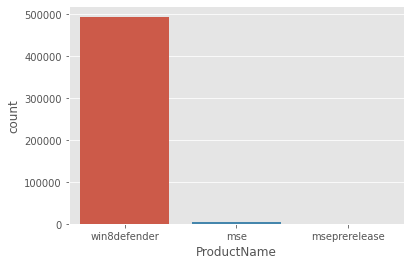

In [ ]:
sns.countplot(data=df_tratando_categoricas, x='ProductName')

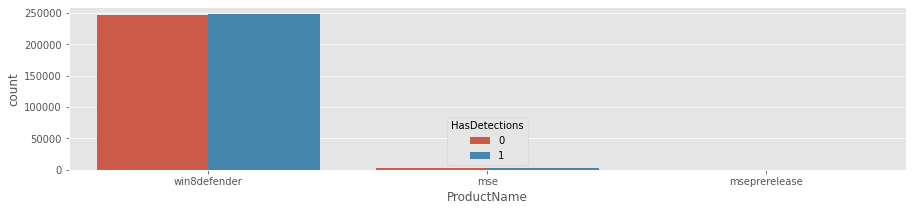

In [ ]:
plt.figure(figsize=[15,3])
sns.countplot(data=df_tratando_categoricas, x='ProductName', hue=target)

aquí podemos ver que  el producto más usado es win8defender, y que las infecciónes en ese producto están en un 50 50 practicamente 

In [ ]:
df_tratando_categoricas = OHE(df_tratando_categoricas,'ProductName')

In [ ]:
df_tratando_categoricas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Data columns (total 83 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   EngineVersion                                      500000 non-null  object  
 1   AppVersion                                         500000 non-null  object  
 2   AvSigVersion                                       500000 non-null  object  
 3   IsBeta                                             500000 non-null  int64   
 4   RtpStateBitfield                                   500000 non-null  category
 5   IsSxsPassiveMode                                   500000 non-null  int64   
 6   DefaultBrowsersIdentifier                          500000 non-null  object  
 7   AVProductStatesIdentifier                          500000 non-null  object  
 8   AVProductsIn

vemos que el OHE agrego 3 columnas mas en formato numerico

In [ ]:
######################################################################################################################################################


In [ ]:
#podemos ver que tiene muchisismos valores asique usaremos setOthers
df_tratando_categoricas['EngineVersion'].value_counts()

1.1.15200.1    216491
1.1.15100.1    205494
1.1.15000.2     14752
1.1.14901.4     11984
1.1.14600.4      9005
1.1.14800.3      7548
1.1.15300.6      6769
1.1.14104.0      5240
1.1.15300.5      3883
1.1.13504.0      3876
1.1.14700.5      2593
1.1.14500.5      2591
1.1.14405.2      1972
1.1.14306.0      1329
1.1.14202.0       840
1.1.14003.0       804
1.1.13303.0       516
1.1.13903.0       515
1.1.13804.0       513
1.1.13407.0       479
1.1.13601.0       420
1.1.12902.0       321
1.1.14305.0       270
1.1.13704.0       255
1.1.13701.0       255
1.1.13202.0       245
1.1.13103.0       235
1.1.13000.0       220
1.1.15000.1       138
1.1.12805.0       115
1.1.14901.3        71
1.1.14700.4        65
1.1.14700.3        61
1.1.14800.1        51
1.1.14500.2        19
1.1.14201.0        11
1.1.14303.0        10
1.1.12101.0         7
1.1.14103.0         5
1.1.12804.0         4
1.1.13802.0         4
1.1.13902.0         4
1.1.13803.0         3
1.1.12603.0         3
1.1.11701.0         3
1.1.14001.

In [ ]:
df_tratando_categoricas['EngineVersion'] = setOthers(df_tratando_categoricas,'EngineVersion',5)

In [ ]:
df_tratando_categoricas['EngineVersion'].value_counts()

1.1.15200.1    216491
1.1.15100.1    205494
404             42274
1.1.15000.2     14752
1.1.14901.4     11984
1.1.14600.4      9005
Name: EngineVersion, dtype: int64

a continuación vemos que hay una versión que tiene considerablemente más infecciones que el resto

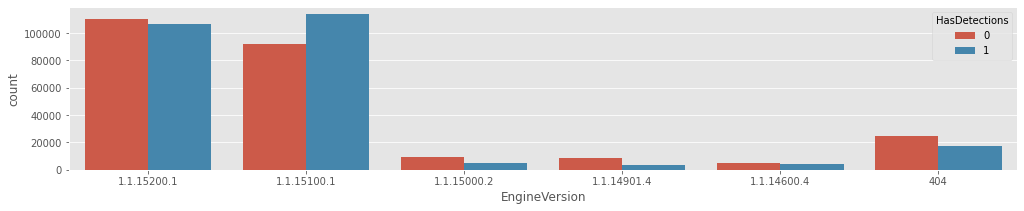

In [ ]:
plt.figure(figsize=[17,3])
sns.countplot(data=df_tratando_categoricas, x='EngineVersion', hue=target)

In [ ]:
df_tratando_categoricas = OHE(df_tratando_categoricas,'EngineVersion')

In [ ]:
######################################################################################################################################################

In [ ]:
df_tratando_categoricas['AppVersion'].value_counts()

4.18.1807.18075    288809
4.18.1806.18062     47641
4.12.16299.15       20197
4.10.209.0          15292
4.13.17134.1        14414
                    ...  
4.15.17655.1000         1
4.15.17650.1001         1
4.13.17639.1000         1
4.18.1807.18070         1
4.13.17618.1000         1
Name: AppVersion, Length: 95, dtype: int64

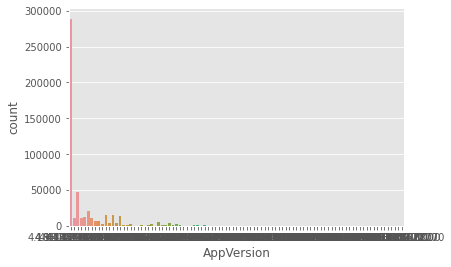

In [ ]:
sns.countplot(data=df_tratando_categoricas, x='AppVersion')

 vemos que la mayoria están en la misma version, pero hay muchas versiones 

In [ ]:
df_tratando_categoricas['AppVersion'] = setOthers(df_tratando_categoricas,'AppVersion',5)

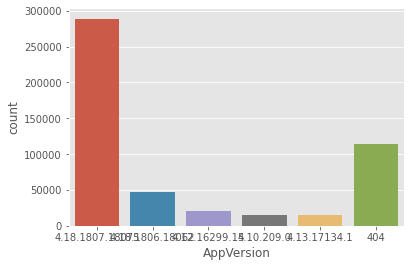

In [ ]:
sns.countplot(data=df_tratando_categoricas, x='AppVersion')

In [ ]:
df_tratando_categoricas = OHE(df_tratando_categoricas,'AppVersion')

In [ ]:
######################################################################################################################################################

In [ ]:
df_tratando_categoricas['DefaultBrowsersIdentifier'].value_counts()

111111    475939
239.0       2589
3195.0      2423
1632.0      1601
3176.0      1313
           ...  
1199.0         1
2334.0         1
2353.0         1
1167.0         1
1733.0         1
Name: DefaultBrowsersIdentifier, Length: 555, dtype: int64

In [ ]:
df_tratando_categoricas['DefaultBrowsersIdentifier'] = setOthers(df_tratando_categoricas,'DefaultBrowsersIdentifier',5)

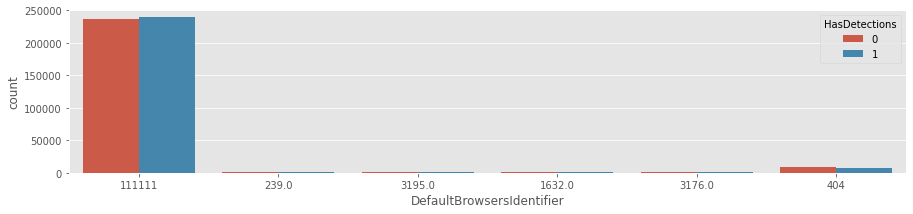

In [ ]:
plt.figure(figsize=[15,3])
sns.countplot(data=df_tratando_categoricas, x='DefaultBrowsersIdentifier', hue=target)

de esta columna podemos decir que la mayoria eran nulos por eso estan a 1111 y los otros datos no son demasiado relevantes 

In [ ]:
df_tratando_categoricas = OHE(df_tratando_categoricas,'DefaultBrowsersIdentifier')

In [ ]:
######################################################################################################################################################

In [ ]:
df_tratando_categoricas['Platform'].value_counts()

windows10      483048
windows8        10825
windows7         5314
windows2016       813
Name: Platform, dtype: int64

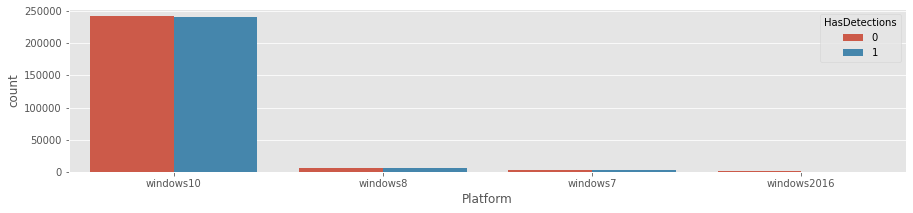

In [ ]:
plt.figure(figsize=[15,3])
sns.countplot(data=df_tratando_categoricas, x='Platform', hue=target)

In [ ]:
df_tratando_categoricas = OHE(df_tratando_categoricas,'Platform')

In [ ]:
######################################################################################################################################################

In [ ]:
df_tratando_categoricas['Processor'].value_counts()

x64      454423
x86       45563
arm64        14
Name: Processor, dtype: int64

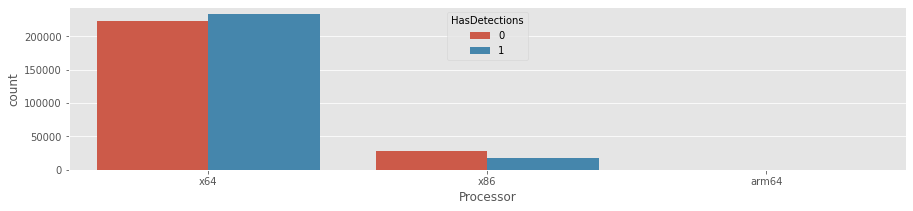

In [ ]:
plt.figure(figsize=[15,3])
sns.countplot(data=df_tratando_categoricas, x='Processor', hue=target)

podemos ver que la mayoria son x64 y como es normal es donde hay más infectados,pero los x86 se reducen casi a la mitad, es decir los 64x est;an infectados el 90% y los 86 el 50% y de los arm 64 no hay ningún infectado, también teniendo en cuenta que de los que hay menos.

In [ ]:
df_tratando_categoricas = OHE(df_tratando_categoricas,'Processor')

In [ ]:
######################################################################################################################################################

In [ ]:
df_tratando_categoricas['OsVer'].value_counts()

10.0.0.0      483830
6.3.0.0        10818
6.1.1.0         5281
6.1.0.0           33
10.0.3.0          12
10.0.1.0           7
6.3.1.0            2
10.0.32.72         2
6.3.3.0            2
10.0.0.1           2
10.0.4.0           1
10.0.80.0          1
6.3.32.72          1
10.0.32.0          1
10.0.5.0           1
6.3.5.0            1
10.0.7.0           1
10.0.0.112         1
10.0.8.0           1
10.0.2.0           1
6.3.7.0            1
Name: OsVer, dtype: int64

In [ ]:
df_tratando_categoricas['OsVer'] = setOthers(df_tratando_categoricas,'OsVer',3)

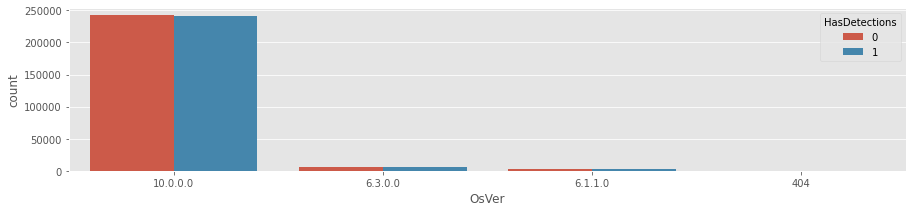

In [ ]:
plt.figure(figsize=[15,3])
sns.countplot(data=df_tratando_categoricas, x='OsVer', hue=target)

In [ ]:
df_tratando_categoricas = OHE(df_tratando_categoricas,'OsVer')

In [ ]:
######################################################################################################################################################

In [ ]:
df_tratando_categoricas['Census_MDC2FormFactor'].value_counts()

Notebook        320948
Desktop         109527
Convertible      22369
Detachable       16802
AllInOne         16372
PCOther           7800
LargeTablet       3645
SmallTablet       1797
SmallServer        496
MediumServer       192
LargeServer         50
ServerOther          2
Name: Census_MDC2FormFactor, dtype: int64

In [ ]:
df_tratando_categoricas['Census_MDC2FormFactor'] = setOthers(df_tratando_categoricas,'Census_MDC2FormFactor',6)

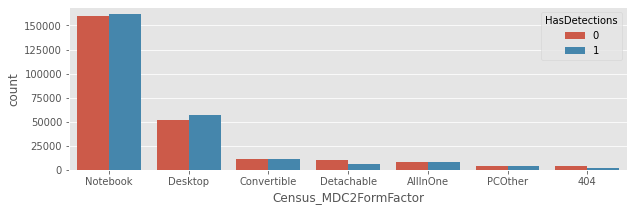

In [ ]:
plt.figure(figsize=[10,3])
sns.countplot(data=df_tratando_categoricas, x='Census_MDC2FormFactor', hue=target)

In [ ]:
df_tratando_categoricas = OHE(df_tratando_categoricas,'Census_MDC2FormFactor')

In [ ]:
######################################################################################################################################################

**por tiempo lo que are sera hacer OHE a todas las variables posibles y eliminar las que no se puedan.**

In [ ]:

df_tratando_categoricas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 112 entries, AvSigVersion to Census_MDC2FormFactor_404
dtypes: category(14), float64(9), int64(12), object(38), uint8(39)
memory usage: 274.2+ MB


In [ ]:
df_tratando_categoricas['CountryIdentifier'].value_counts()

43     22339
29     19273
141    18420
93     16205
171    15743
       ...  
212       13
37        12
165       11
217       10
193        9
Name: CountryIdentifier, Length: 222, dtype: int64

In [ ]:
df_tratando_categoricas['CountryIdentifier'] = setOthers(df_tratando_categoricas,'CountryIdentifier',5)

In [ ]:
df_tratando_categoricas = OHE(df_tratando_categoricas,'CountryIdentifier')

In [ ]:
######################################################################################################################################################

In [ ]:
df_tratando_categoricas['LocaleEnglishNameIdentifier'].value_counts()

75     117818
182     25187
42      23007
74      22894
88      20988
        ...  
135         1
28          1
187         1
180         1
131         1
Name: LocaleEnglishNameIdentifier, Length: 233, dtype: int64

In [ ]:
df_tratando_categoricas['LocaleEnglishNameIdentifier'] = setOthers(df_tratando_categoricas,'LocaleEnglishNameIdentifier',5)

In [ ]:
df_tratando_categoricas = OHE(df_tratando_categoricas,'LocaleEnglishNameIdentifier')

In [ ]:
######################################################################################################################################################

In [ ]:
df_tratando_categoricas = OHE(df_tratando_categoricas,'Census_ProcessorClass')

In [ ]:
######################################################################################################################################################

In [ ]:
df_tratando_categoricas['Census_OSVersion'].value_counts()

10.0.17134.228     79975
10.0.17134.165     50511
10.0.16299.431     30519
10.0.17134.285     26289
10.0.17134.112     19501
                   ...  
10.0.18219.1000        1
10.0.14421.191         1
10.0.15063.448         1
10.0.17046.1000        1
10.0.14393.206         1
Name: Census_OSVersion, Length: 305, dtype: int64

In [ ]:
df_tratando_categoricas['Census_OSVersion'] = setOthers(df_tratando_categoricas,'Census_OSVersion',5)

In [ ]:
df_tratando_categoricas = OHE(df_tratando_categoricas,'Census_OSVersion')

In [ ]:
###################################################################################################################################

In [ ]:
df_tratando_categoricas['Census_DeviceFamily'].value_counts()

Windows.Desktop    499183
Windows.Server        816
Windows                 1
Name: Census_DeviceFamily, dtype: int64

In [ ]:
df_tratando_categoricas = OHE(df_tratando_categoricas,'Census_DeviceFamily')

In [ ]:
###################################################################################################################################

In [ ]:
df_tratando_categoricas['Census_OSSkuName'].value_counts()

CORE                            194464
PROFESSIONAL                    178947
CORE_SINGLELANGUAGE             108674
CORE_COUNTRYSPECIFIC              9257
EDUCATION                         2313
ENTERPRISE                        2063
PROFESSIONAL_N                    1634
ENTERPRISE_S                      1107
STANDARD_SERVER                    584
CLOUD                              332
CORE_N                             251
STANDARD_EVALUATION_SERVER         151
EDUCATION_N                         61
ENTERPRISE_S_N                      48
DATACENTER_EVALUATION_SERVER        47
SB_SOLUTION_SERVER                  34
ENTERPRISE_N                        28
PRO_WORKSTATION                      2
CLOUDN                               1
UNLICENSED                           1
PRO_WORKSTATION_N                    1
Name: Census_OSSkuName, dtype: int64

In [ ]:
df_tratando_categoricas['Census_OSSkuName'] = setOthers(df_tratando_categoricas,'Census_OSSkuName',6)

In [ ]:
df_tratando_categoricas = OHE(df_tratando_categoricas,'Census_OSSkuName')

In [ ]:
###################################################################################################################################

In [ ]:
df_tratando_categoricas['SkuEdition'].value_counts()

Home               308567
Pro                181042
Invalid              4423
Education            2321
Enterprise           1999
Enterprise LTSB      1141
Cloud                 309
Server                198
Name: SkuEdition, dtype: int64

In [ ]:
df_tratando_categoricas = OHE(df_tratando_categoricas,'SkuEdition')

In [ ]:
###################################################################################################################################

In [ ]:
df_tratando_categoricas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 145 entries, AvSigVersion to SkuEdition_Server
dtypes: category(14), float64(9), int64(12), object(31), uint8(79)
memory usage: 266.5+ MB


In [ ]:
###################################################################################################################################

In [ ]:
# aquí genero una lista con las culumnas tratadas
columnas_tratadas = ['ProductName','EngineVersion','AppVersion','DefaultBrowsersIdentifier','AVProductStatesIdentifier','CountryIdentifier','LocaleEnglishNameIdentifier','Platform','Processor','OsVer','Census_OSVersion','Census_MDC2FormFactor','Census_ProcessorClass','Census_DeviceFamily','Census_OSSkuName']

In [ ]:
len(columnas_tratadas)

15

In [ ]:
#aqui hago una función que borra de la lista categoricas las columnas tratadas, 
def lista_preparet(lista_categoricas,columnas_tratadas):
  return [ i for i in lista_categoricas if i not in columnas_tratadas ]

In [ ]:
lista_columna_aborrar = lista_preparet(lista_categoricas,columnas_tratadas)

In [ ]:
#solo para probar variables diferentes 
lista_columna_aborrar

['AvSigVersion',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'PuaMode',
 'IeVerIdentifier',
 'SmartScreen',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_InternalBatteryType',
 'Census_OSArchitecture',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSInstallTypeName',
 'Census_OSInstallLanguageIdentifier',
 'Census_OSUILocaleIdentifier',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel',
 'Census_FlightRing',
 'Census_FirmwareManufacturerIdentifier',
 'Census_FirmwareVersionIdentifier',
 'Wdft_RegionIdentifier']

 **voy a lanzar el modelo con estas columnas, para ello voy a crear una copia de este df y luego borrare todo lo que no sea numerico** 

In [ ]:
df_modelo = df_tratando_categoricas.copy()

In [ ]:
df_tratando_categoricas.shape

(500000, 145)

In [ ]:
df_modelo.shape

(500000, 145)

In [ ]:
#df_modelo.drop(columns=lista_categoricas,axis=1,errors = "ignore",inplace = True )

In [ ]:
df_modelo.shape

(500000, 145)

In [ ]:
################################################### Borrar  las categoricas ###############################################

In [ ]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 145 entries, AvSigVersion to SkuEdition_Server
dtypes: category(14), float64(9), int64(12), object(31), uint8(79)
memory usage: 266.5+ MB


In [ ]:
#genera una lista donde nos saca todas las variables que no le sirven al modelo 
#para_borrar_cat1 = df_modelo.select_dtypes(exclude=['int64','float64','uint8'])
#para_borrar_cat1 = df_modelo.select_dtypes(exclude=[np.number])

In [ ]:
para_borrar_cat1 = df_modelo.select_dtypes(include=[object])

In [ ]:
#borramos del dataframe todas las variables que no son de tipo numérico
df_modelo.drop(columns = para_borrar_cat1,axis=1,errors = "ignore",inplace = True )


In [ ]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500000 entries, f1cd864e97bae82bdf96523e1a539121 to 7b45dc3537e17f16305c5983ca0a1cb9
Columns: 114 entries, IsBeta to SkuEdition_Server
dtypes: category(14), float64(9), int64(12), uint8(79)
memory usage: 148.3+ MB


Con este dataframe limpio podemos construir el modelo definitivo.

#Segundo modelo

Dvidir el DF
```
train 60% ------> 299.978
test 20% ------> 99.992
validation 20% ------> 99.992
dev train + test ------> 399.970

```

In [ ]:
dev_df = df_modelo[0:399970] #development = train + test
dev_df.shape

(399970, 114)

In [ ]:
val_df = df_modelo[399970:] # validation
val_df.shape

(100030, 114)

In [ ]:
dev_df_X = dev_df.drop("HasDetections", axis= 1)
dev_df_y = dev_df[['HasDetections']]

In [ ]:
val_df_X = val_df.drop("HasDetections", axis= 1)
val_df_y = val_df[['HasDetections']]

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        dev_df_X, # X 
                                        dev_df_y, # y
                                        test_size = 0.30, # tamaño del split aleatorio 
                                        random_state = 42
                                     )

In [ ]:
dt = DecisionTreeClassifier(
                        # criterion='gini',
                        # splitter='best',
                        max_depth=10, # Importante, regulará el sobreajuste
                        # min_samples_split=2,
                        # min_samples_leaf=1,
                        # min_weight_fraction_leaf=0.0,
                        # max_features=None,
                        random_state=42,
                        # max_leaf_nodes=None,
                        # min_impurity_decrease=0.0,
                        # min_impurity_split=None,
                        # class_weight=None,
                        # presort=False,  
                )

In [ ]:
dt.fit(
    X=X_train, 
    y=y_train, 
    # sample_weight=None, 
    # check_input=True, 
    # X_idx_sorted=None
)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
graph = graphviz.Source(dot_data)
graph

In [ ]:
y_test_pred = pd.DataFrame(dt.predict(X_test), index=y_test.index, columns=['HasDetectionsPrediction'])

In [ ]:
results_df2 = y_test.join(y_test_pred, how= 'inner')

In [ ]:
results_df2['Success'] = (results_df2['HasDetections'] == results_df2['HasDetectionsPrediction']).astype(int)

In [ ]:
results_df2['Success'].count()

119991

In [ ]:
porcentaje_de_acierto = results_df2['Success'].sum()*0.100/100 

In [ ]:
porcentaje_de_acierto

71.799

#Conclusión final

In [ ]:
results_df2['HasDetectionsPrediction'].value_counts()

1    63433
0    56558
Name: HasDetectionsPrediction, dtype: int64

Podemos ver que nuestro modelo tiende a marcar que los equipos  están infectados, esto se podria mejorar pasandole más variables relebantes que le hagan diferenciar mejor si un equipo  está realmente infectado o no

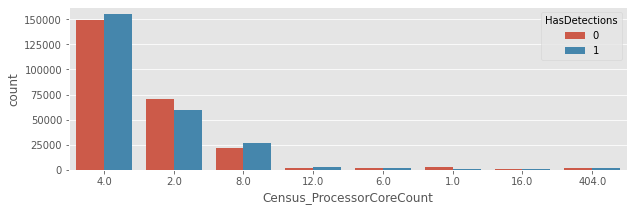

In [ ]:
plt.figure(figsize=[10,3])
sns.countplot(data=df_modelo, x='Census_ProcessorCoreCount', hue=target)

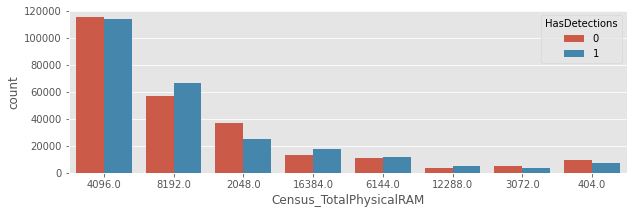

In [ ]:
plt.figure(figsize=[10,3])
sns.countplot(data=df_modelo, x='Census_TotalPhysicalRAM', hue=target)

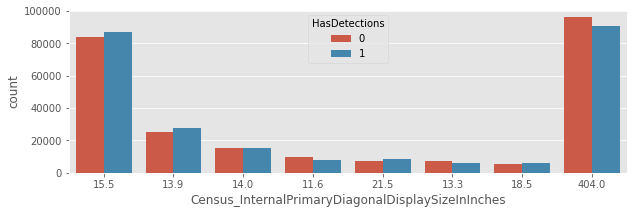

In [ ]:
plt.figure(figsize=[10,3])
sns.countplot(data=df_modelo, x='Census_InternalPrimaryDiagonalDisplaySizeInInches', hue=target)

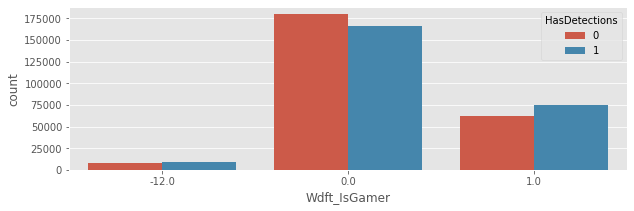

In [ ]:
plt.figure(figsize=[10,3])
sns.countplot(data=df_modelo, x='Wdft_IsGamer', hue=target)

Con los plots anteriores podemos observar que la mayoría de equipos que resultan infectados tienen componentes, típicos de PC estándar, es decir el equipo medio de hogar o de oficina.  Los equipos de más altas prestaciones suelen ser servidores u ordenadores que se cuidan bien, porque son más caros y suelen tener datos más importantes. 
Los ordenadores de oficina y de casa, son más susceptibles a ser infectados por el uso del correo electrónico que es una de las entradas principales de virus en los ordenadores